## Rod Cutting Problem

In [1]:
from collections import defaultdict

In [2]:
prices = defaultdict(lambda : -float('inf'))

In [3]:
for i, v in enumerate([1, 5, 8, 9, 10, 17, 17, 20, 24, 30]):
    prices[i+1] = v

In [4]:
from functools import wraps

In [5]:
def memo(func):
    cache = {}
    @wraps(func)
    def __wrap(*args, **kwargs):
        str_key = str(args) + str(kwargs)
        if str_key not in cache:
            result = func(*args, **kwargs)
            cache[str_key] = result
        return cache[str_key]
    return __wrap

In [6]:
solution = {}
@memo
def revenue(r):
    split, r_star = max([(0, prices[r])] + [(i, revenue(i) + revenue(r-i)) for i in range(1, r)], key=lambda x: x[1])
    solution[r] = (split, r-split)
    return r_star

In [7]:
revenue(18)

52

In [8]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16)}

In [9]:
def parse_solution(r, revenue_solution):
    left, right = revenue_solution[r]
    if left == 0: return [right]
    return [left] + parse_solution(right, revenue_solution)

In [10]:
parse_solution(18, solution)

[2, 6, 10]

## Edit Distance

In [11]:
@memo
def get_edit_distance(str1, str2):
    if len(str1) == 0: return len(str2)
    if len(str2) == 0: return len(str1)
    return min(
       [get_edit_distance(str1[:-1], str2) + 1,
        get_edit_distance(str1, str2[:-1]) + 1,
        get_edit_distance(str1[:-1], str2[:-1]) + (0 if str1[-1] == str2[-1] else 2)]
    )

In [12]:
get_edit_distance('biejing', 'beijing')

2

In [13]:
get_edit_distance('biejing', 'beijie')

5

In [14]:
get_edit_distance('biejing', 'beijin')

3

## Optional

In [15]:
import random

In [16]:
import matplotlib.pylab as plt

In [17]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

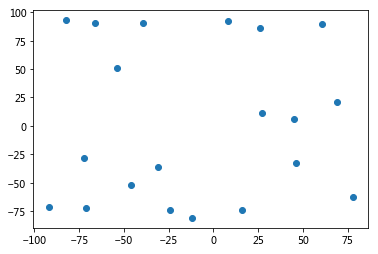

In [18]:
plt.scatter(latitudes, longitudes)

In [19]:
car_number = 3